# IMDB Predictive Analytics

This notebook explores using data science techniques on a data set of 5000+ movies, and predicting whether a movie will be highly rated on IMDb.

The objective of this notebook is to follow a step-by-step workflow, explaining each step and rationale for every decision we take during solution development.

This notebook is adapted from ["Titanic Data Science Solutions" by Manav Sehgal](https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions)


## Workflow stages

This workflow goes through seven stages.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.


## Question and problem definition

The original data set used in this notebook [can be found here at Kaggle](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

> Knowing from a training set of samples listing movies and their IMDb scores, can our model determine based on a given test dataset not containing the scores, if the movies in the test dataset scored highly or not?


## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on [Which chart or graph is right for you?](http://www.tableau.com/learn/whitepapers/which-chart-or-graph-is-right-for-you#ERAcoH5sEG5CFlek.99).

In [329]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames. We will partition off 80% as our training data and 20% of the data as our test data. We also combine these datasets to run certain operations on both datasets together.

In [330]:
df = pd.read_csv('../input/movie_metadata.csv')
train_df, test_df = train_test_split(df, test_size = 0.2)
# test_actual = test_df['imdb_score']
# test_df = test_df.drop('imdb_score', axis=1)
combine = [train_df, test_df]

## Analyze by describing data

Pandas also helps describe the datasets answering following questions early in our project.

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Kaggle page here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

In [331]:
print(train_df.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


**Which features are categorical?**

- Color, Director name, Actor 1 name, Actor 2 name, Actor 3 name, Genres, Language, Country, Content Rating, Movie title, Plot keywords, Movie IMDb link

**Which features are numerical?**

- Number of critics for reviews, Duration, Director Facebook likes, Actor 1 Facebook likes, Actor 2 Facebook likes, Actor 3 Facebook likes, Gross, Number of voted users, Cast total Facebook likes, Number of faces in poster, Number of users for reviews, Budget, Title year, IMDb score, Aspect ratio, Movie Facebook likes

In [332]:
pd.set_option('display.max_columns', 50)

In [333]:
# preview the data
train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
319,Color,Lawrence Guterman,78.0,94.0,6.0,227.0,Traylor Howard,490.0,17010646.0,Comedy|Family|Fantasy,Jamie Kennedy,Son of the Mask,40751,1195,Ben Stein,0.0,baby|cartoon on tv|cartoonist|dog|mask,http://www.imdb.com/title/tt0362165/?ref_=fn_t...,239.0,English,USA,PG,84000000.0,2005.0,294.0,2.2,1.85,881
1990,Color,John Guillermin,21.0,117.0,71.0,42.0,Donovan Scott,433.0,NaN,Adventure|Fantasy,Tanya Roberts,Sheena,3334,611,Ted Wass,1.0,chimpanzee|elephant|jungle|mercenary|shaman,http://www.imdb.com/title/tt0088103/?ref_=fn_t...,52.0,English,UK,PG,25000000.0,1984.0,54.0,4.8,2.35,739
42,Color,Martin Campbell,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Action|Adventure|Sci-Fi,Ryan Reynolds,Green Lantern,223393,17657,Taika Waititi,2.0,autopsy|lantern|planet|ring|test pilot,http://www.imdb.com/title/tt1133985/?ref_=fn_t...,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,5.6,2.35,24000
120,Color,Christopher Nolan,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Action|Adventure,Christian Bale,Batman Begins,980946,59558,Morgan Freeman,0.0,armored car|gangster|gotham|mixed martial arts...,http://www.imdb.com/title/tt0372784/?ref_=fn_t...,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,8.3,2.35,15000
2671,Color,John Ottman,108.0,97.0,83.0,579.0,Joey Lawrence,912.0,21468807.0,Horror|Mystery|Thriller,Loretta Devine,Urban Legends: Final Cut,13048,2682,Jacinda Barrett,2.0,film set|movie set|sequel|slow motion|urban le...,http://www.imdb.com/title/tt0192731/?ref_=fn_t...,227.0,English,USA,R,14000000.0,2000.0,786.0,4.1,2.35,243


In [334]:
incomplete = train_df.columns[pd.isnull(df).any()].tolist()
train_df[incomplete].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 319 to 1904
Data columns (total 21 columns):
color                      4019 non-null object
director_name              3952 non-null object
num_critic_for_reviews     3996 non-null float64
duration                   4023 non-null float64
director_facebook_likes    3952 non-null float64
actor_3_facebook_likes     4016 non-null float64
actor_2_name               4024 non-null object
actor_1_facebook_likes     4029 non-null float64
gross                      3341 non-null float64
actor_1_name               4029 non-null object
actor_3_name               4016 non-null object
facenumber_in_poster       4024 non-null float64
plot_keywords              3913 non-null object
num_user_for_reviews       4017 non-null float64
language                   4022 non-null object
country                    4029 non-null object
content_rating             3797 non-null object
budget                     3641 non-null float64
title_year        

**Which features contain blank, null or empty values?**

These will require correcting.

 - color
 - director_name
 - num_critic_for_reviews
 - duration
 - director_facebook_likes
 - actor_3_facebook_likes
 - actor_2_name
 - actor_1_facebook_likes
 - gross
 - actor_1_name
 - actor_3_name
 - facenumber_in_poster
 - plot_keywords
 - num_user_for_reviews
 - language
 - country
 - content_rating
 - budget
 - title_year
 - actor_2_facebook_likes
 - aspect_ratio

**What are the data types for various features?**

Helping us during converting goal.

- Twelve features are floats.
- Nine features are strings (object).

In [335]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 319 to 1904
Data columns (total 28 columns):
color                        4019 non-null object
director_name                3952 non-null object
num_critic_for_reviews       3996 non-null float64
duration                     4023 non-null float64
director_facebook_likes      3952 non-null float64
actor_3_facebook_likes       4016 non-null float64
actor_2_name                 4024 non-null object
actor_1_facebook_likes       4029 non-null float64
gross                        3341 non-null float64
genres                       4034 non-null object
actor_1_name                 4029 non-null object
movie_title                  4034 non-null object
num_voted_users              4034 non-null int64
cast_total_facebook_likes    4034 non-null int64
actor_3_name                 4016 non-null object
facenumber_in_poster         4024 non-null float64
plot_keywords                3913 non-null object
movie_imdb_link              4034 no

In [336]:
train_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3996.000000,4023.000000,3952.000000,4016.000000,4029.000000,3.341000e+03,4.034000e+03,4034.000000,4024.000000,4017.000000,3.641000e+03,3950.000000,4024.000000,4034.000000,3764.000000,4034.000000
mean,139.869620,107.082277,652.580213,642.148904,6622.105485,4.827216e+07,8.329444e+04,9733.889440,1.376740,272.230022,4.125173e+07,2002.544810,1632.831511,6.437903,2.220449,7450.817551
std,121.230278,25.080188,2713.767089,1674.618297,16014.272172,6.878943e+07,1.345340e+05,19098.697073,2.049042,365.655350,2.293602e+08,12.273035,4127.174371,1.119566,1.386323,19316.520445
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,131.000000,615.000000,5.300000e+06,8.833000e+03,1404.750000,0.000000,66.000000,6.000000e+06,1999.000000,279.000000,5.800000,1.850000,0.000000
50%,110.000000,104.000000,49.000000,365.000000,989.000000,2.527756e+07,3.451000e+04,3100.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,193.250000,117.000000,194.000000,634.250000,11000.000000,6.111292e+07,9.654375e+04,13632.500000,2.000000,327.000000,4.500000e+07,2011.000000,912.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,4144.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


**What is the distribution of categorical features?**

In [337]:
train_df.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4019,3952,4024,4034,4029,4034,4016,3913,4034,4022,4029,3797
unique,2,2065,2589,817,1795,3943,2963,3817,3944,42,61,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,Anne Hathaway,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,3854,22,14,188,37,3,7,3,3,3756,3035,1703


### Transformation of IMDb score

Let's simplify this problem into a binary classification/regression. Let us treat all movies with an IMDb score of 7.0 or higher as "good" (with a value of '1') and all below as "bad" (with a value of '0').

In [338]:
for dataset in combine:
    dataset.loc[ dataset['imdb_score'] < 7.0, 'imdb_score'] = 0
    dataset.loc[ dataset['imdb_score'] >= 7.0, 'imdb_score'] = 1

train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
319,Color,Lawrence Guterman,78.0,94.0,6.0,227.0,Traylor Howard,490.0,17010646.0,Comedy|Family|Fantasy,Jamie Kennedy,Son of the Mask,40751,1195,Ben Stein,0.0,baby|cartoon on tv|cartoonist|dog|mask,http://www.imdb.com/title/tt0362165/?ref_=fn_t...,239.0,English,USA,PG,84000000.0,2005.0,294.0,0.0,1.85,881
1990,Color,John Guillermin,21.0,117.0,71.0,42.0,Donovan Scott,433.0,NaN,Adventure|Fantasy,Tanya Roberts,Sheena,3334,611,Ted Wass,1.0,chimpanzee|elephant|jungle|mercenary|shaman,http://www.imdb.com/title/tt0088103/?ref_=fn_t...,52.0,English,UK,PG,25000000.0,1984.0,54.0,0.0,2.35,739
42,Color,Martin Campbell,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Action|Adventure|Sci-Fi,Ryan Reynolds,Green Lantern,223393,17657,Taika Waititi,2.0,autopsy|lantern|planet|ring|test pilot,http://www.imdb.com/title/tt1133985/?ref_=fn_t...,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,0.0,2.35,24000
120,Color,Christopher Nolan,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Action|Adventure,Christian Bale,Batman Begins,980946,59558,Morgan Freeman,0.0,armored car|gangster|gotham|mixed martial arts...,http://www.imdb.com/title/tt0372784/?ref_=fn_t...,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,1.0,2.35,15000
2671,Color,John Ottman,108.0,97.0,83.0,579.0,Joey Lawrence,912.0,21468807.0,Horror|Mystery|Thriller,Loretta Devine,Urban Legends: Final Cut,13048,2682,Jacinda Barrett,2.0,film set|movie set|sequel|slow motion|urban le...,http://www.imdb.com/title/tt0192731/?ref_=fn_t...,227.0,English,USA,R,14000000.0,2000.0,786.0,0.0,2.35,243


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with IMDb score. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

**Correcting.**

**Creating.**

**Classifying.**


## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [339]:
train_df[['content_rating', 'imdb_score']].groupby(['content_rating'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,content_rating,imdb_score
15,TV-Y7,1.000000
14,TV-Y,1.000000
12,TV-MA,1.000000
0,Approved,0.769231
10,TV-14,0.720000
13,TV-PG,0.700000
8,Passed,0.666667
16,Unrated,0.520833
17,X,0.500000
2,GP,0.500000


In [340]:
train_df[["color", "imdb_score"]].groupby(['color'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,color,imdb_score
0,Black and White,0.666667
1,Color,0.338609


In [341]:
train_df[["director_name", "imdb_score"]].groupby(['director_name'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,director_name,imdb_score
637,Gaspar Noé,1.0
1605,Richard Glatzer,1.0
314,Christopher Morris,1.0
1603,Richard Eyre,1.0
1871,Sylvain Chomet,1.0
735,Hong-jin Na,1.0
736,Howard Hughes,1.0
1601,Richard Dutcher,1.0
308,Christopher Guest,1.0
1599,Richard Curtis,1.0


In [342]:
train_df[["country", "imdb_score"]].groupby(['country'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)

,country,imdb_score
0,Afghanistan,1.000000
12,Colombia,1.000000
59,United Arab Emirates,1.000000
50,Soviet Union,1.000000
40,Panama,1.000000
39,Pakistan,1.000000
32,Libya,1.000000
31,Kyrgyzstan,1.000000
27,Israel,1.000000
25,Iran,1.000000


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (IMDb score).

**Observations.**

**Decisions.**

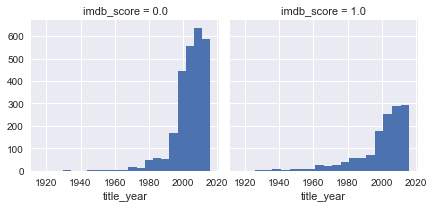

In [343]:
g = sns.FacetGrid(train_df, col='imdb_score')
g.map(plt.hist, 'title_year', bins=20)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

**Decisions.**


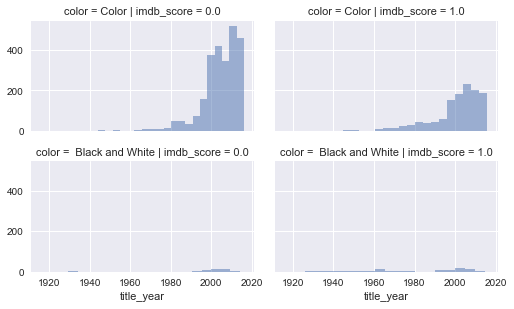

In [344]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='imdb_score', row='color', size=2.2, aspect=1.6)
grid.map(plt.hist, 'title_year', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

**Decisions.**


In [345]:
# grid = sns.FacetGrid(train_df, col='Embarked')
# grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
# grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
# grid.add_legend()

### Correlating categorical and numerical features

**Observations.**

**Decisions.**


In [346]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
# grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
# grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
# grid.add_legend()

## Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the actor_2_name, genres, actor_1_name, movie_title, actor_3_name, plot_keywords, movie_imdb_link features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [347]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['genres', 'movie_title', 'plot_keywords', 'movie_imdb_link'], axis=1)
test_df = test_df.drop(['genres', 'movie_title', 'plot_keywords', 'movie_imdb_link'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (4034, 28), (1009, 28), (4034, 28), (1009, 28))


('After', (4034, 24), (1009, 24), (4034, 24), (1009, 24))

### Creating new feature extracting from existing

We want to analyze if the Director and Actor name features can be engineered to extract number of films starred or directed and test correlation between number of films and score, before dropping Director and Actor name features.

In the following code we extract the `num_of_films_director` and `num_of_films_actor` features by iterating over the dataframe.

If the director name field is empty, we fill the field with 1.

**Observations.**

When we plot the number of films directed, and number of films acted in, we note the following observations.

- Directors with more films under their belt tend to have a higher success rate. It seems practice *does* make perfect.
- Films where the actors have a higher number of combined films have a higher success rate. A more experienced cast, a better movie.

**Decision.**

- We decide to band the directors into groups by number of films directed.
- We decide to band the "total combined films acted in" into groups.

In [348]:
actors = {}
directors = {}
for dataset in combine:
    for index, row in dataset.iterrows():
        for actor in row[['actor_1_name', 'actor_2_name', 'actor_3_name']]:
            if actor is not np.nan:
                if actor not in actors:
                    actors[actor] = 0
                actors[actor] += 1
        director = row['director_name']
        if director is not np.nan:
            if director not in directors:
                directors[director] = 0
            directors[director] += 1    

In [349]:
for dataset in combine:
    dataset['num_of_films_director'] = dataset["director_name"].dropna().map(directors).astype(int)
    dataset['num_of_films_director'] = dataset['num_of_films_director'].fillna(1)

In [350]:
train_df['NumFilmsBand'] = pd.cut(train_df['num_of_films_director'], 4)
train_df[['NumFilmsBand', 'imdb_score']].groupby(['NumFilmsBand'], as_index=False).mean().sort_values(by='NumFilmsBand', ascending=True)

,NumFilmsBand,imdb_score
0,"(0.975, 7.25]",0.335108
1,"(7.25, 13.5]",0.411417
2,"(13.5, 19.75]",0.417722
3,"(19.75, 26]",0.666667


In [351]:
for dataset in combine:    
    dataset.loc[ dataset['num_of_films_director'] <= 7, 'num_of_films_director'] = 0
    dataset.loc[(dataset['num_of_films_director'] > 7) & (dataset['num_of_films_director'] <= 13), 'num_of_films_director'] = 1
    dataset.loc[(dataset['num_of_films_director'] > 13) & (dataset['num_of_films_director'] <= 19), 'num_of_films_director'] = 2
    dataset.loc[ dataset['num_of_films_director'] > 19, 'num_of_films_director'] = 3
train_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,NumFilmsBand
319,Color,Lawrence Guterman,78.0,94.0,6.0,227.0,Traylor Howard,490.0,17010646.0,Jamie Kennedy,40751,1195,Ben Stein,0.0,239.0,English,USA,PG,84000000.0,2005.0,294.0,0.0,1.85,881,0.0,"(0.975, 7.25]"
1990,Color,John Guillermin,21.0,117.0,71.0,42.0,Donovan Scott,433.0,NaN,Tanya Roberts,3334,611,Ted Wass,1.0,52.0,English,UK,PG,25000000.0,1984.0,54.0,0.0,2.35,739,0.0,"(0.975, 7.25]"
42,Color,Martin Campbell,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Ryan Reynolds,223393,17657,Taika Waititi,2.0,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,0.0,2.35,24000,1.0,"(7.25, 13.5]"
120,Color,Christopher Nolan,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Christian Bale,980946,59558,Morgan Freeman,0.0,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,1.0,2.35,15000,1.0,"(7.25, 13.5]"
2671,Color,John Ottman,108.0,97.0,83.0,579.0,Joey Lawrence,912.0,21468807.0,Loretta Devine,13048,2682,Jacinda Barrett,2.0,227.0,English,USA,R,14000000.0,2000.0,786.0,0.0,2.35,243,0.0,"(0.975, 7.25]"


We can now remove the director_name and num_of_films_director_band features.

In [352]:
train_df = train_df.drop(['director_name', 'NumFilmsBand'], axis=1)
test_df = test_df.drop(['director_name'], axis=1)

Now, let's examine actors by number of films acted in. Since we have three actors listed per film, we'll need to combine these numbers. Let's fill any empty fields with the median value for that field, and sum the columns.

In [353]:
train_df["actor_1_name"].dropna().map(actors).describe()

count    4029.000000
mean       11.984363
std        11.388683
min         1.000000
25%         3.000000
50%         8.000000
75%        19.000000
max        54.000000
Name: actor_1_name, dtype: float64

In [354]:
train_df['num_of_films_actor_1'] = train_df["actor_1_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_1'] = train_df['num_of_films_actor_1'].fillna(8)

test_df['num_of_films_actor_1'] = test_df["actor_1_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_1'] = test_df['num_of_films_actor_1'].fillna(8)

In [355]:
train_df["actor_2_name"].dropna().map(actors).describe()

count    4024.000000
mean        6.319085
std         7.315725
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        54.000000
Name: actor_2_name, dtype: float64

In [356]:
train_df['num_of_films_actor_2'] = train_df["actor_2_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_2'] = train_df['num_of_films_actor_2'].fillna(4)

test_df['num_of_films_actor_2'] = test_df["actor_2_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_2'] = test_df['num_of_films_actor_2'].fillna(4)

In [357]:
train_df["actor_3_name"].dropna().map(actors).describe()

count    4016.000000
mean        4.080926
std         4.691284
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: actor_3_name, dtype: float64

In [358]:
train_df['num_of_films_actor_3'] = train_df["actor_3_name"].dropna().map(actors).astype(int)
train_df['num_of_films_actor_3'] = train_df['num_of_films_actor_3'].fillna(2)

test_df['num_of_films_actor_3'] = test_df["actor_3_name"].dropna().map(actors).astype(int)
test_df['num_of_films_actor_3'] = test_df['num_of_films_actor_3'].fillna(2)

In [366]:
train_df['actor_sum'] = train_df["num_of_films_actor_1"] + train_df["num_of_films_actor_2"] + train_df["num_of_films_actor_3"]
test_df['actor_sum'] = test_df["num_of_films_actor_1"] + test_df["num_of_films_actor_2"] + test_df["num_of_films_actor_3"]

In [367]:
train_df['ActorSumBand'] = pd.cut(train_df['actor_sum'], 5)
train_df[['ActorSumBand', 'imdb_score']].groupby(['ActorSumBand'], as_index=False).mean().sort_values(by='ActorSumBand', ascending=True)

,ActorSumBand,imdb_score
0,"(2.894, 24.2]",0.341567
1,"(24.2, 45.4]",0.336126
2,"(45.4, 66.6]",0.419263
3,"(66.6, 87.8]",0.447368
4,"(87.8, 109]",0.666667


In [372]:
train_df.loc[ train_df['actor_sum'] <= 24, 'actor_sum'] = 0
train_df.loc[(train_df['actor_sum'] > 24) & (train_df['actor_sum'] <= 45), 'actor_sum'] = 1
train_df.loc[(train_df['actor_sum'] > 45) & (train_df['actor_sum'] <= 66), 'actor_sum'] = 2
train_df.loc[(train_df['actor_sum'] > 66) & (train_df['actor_sum'] <= 87), 'actor_sum'] = 3
train_df.loc[ train_df['actor_sum'] > 87, 'actor_sum'] = 4

In [ ]:
test_df.loc[ test_df['actor_sum'] <= 24, 'actor_sum'] = 0
test_df.loc[(test_df['actor_sum'] > 24) & (test_df['actor_sum'] <= 45), 'actor_sum'] = 1
test_df.loc[(test_df['actor_sum'] > 45) & (test_df['actor_sum'] <= 66), 'actor_sum'] = 2
test_df.loc[(test_df['actor_sum'] > 66) & (test_df['actor_sum'] <= 87), 'actor_sum'] = 3
test_df.loc[ test_df['actor_sum'] > 87, 'actor_sum'] = 4

In [374]:
train_df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_of_films_director,num_of_films_actor_1,num_of_films_actor_2,num_of_films_actor_3,actor_sum,ActorSumBand
319,Color,78.0,94.0,6.0,227.0,Traylor Howard,490.0,17010646.0,Jamie Kennedy,40751,1195,Ben Stein,0.0,239.0,English,USA,PG,84000000.0,2005.0,294.0,0.0,1.85,881,0.0,7.0,2.0,1.0,0.0,"(2.894, 24.2]"
1990,Color,21.0,117.0,71.0,42.0,Donovan Scott,433.0,NaN,Tanya Roberts,3334,611,Ted Wass,1.0,52.0,English,UK,PG,25000000.0,1984.0,54.0,0.0,2.35,739,0.0,2.0,1.0,1.0,0.0,"(2.894, 24.2]"
42,Color,436.0,123.0,258.0,326.0,Temuera Morrison,16000.0,116593191.0,Ryan Reynolds,223393,17657,Taika Waititi,2.0,550.0,English,USA,PG-13,200000000.0,2011.0,368.0,0.0,2.35,24000,1.0,19.0,4.0,1.0,0.0,"(2.894, 24.2]"
120,Color,478.0,128.0,22000.0,11000.0,Liam Neeson,23000.0,205343774.0,Christian Bale,980946,59558,Morgan Freeman,0.0,2685.0,English,USA,PG-13,150000000.0,2005.0,14000.0,1.0,2.35,15000,1.0,28.0,34.0,47.0,4.0,"(87.8, 109]"
2671,Color,108.0,97.0,83.0,579.0,Joey Lawrence,912.0,21468807.0,Loretta Devine,13048,2682,Jacinda Barrett,2.0,227.0,English,USA,R,14000000.0,2000.0,786.0,0.0,2.35,243,0.0,14.0,1.0,4.0,0.0,"(2.894, 24.2]"


Now we can remove `actor_1_name`, `actor_2_name`, `actor_3_name` and `ActorSumBand`

In [375]:
train_df = train_df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'ActorSumBand'], axis=1)
test_df = test_df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)

We can convert the categorical titles to ordinal.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

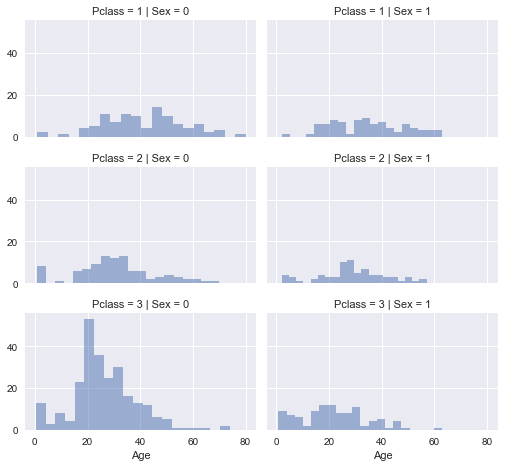

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


Let us replace Age with ordinals based on these bands.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


We can now remove the AgeBand feature.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can now create FareBand.

In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [86]:
X_train = train_df.drop("imdb_score", axis=1)
Y_train = train_df["imdb_score"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((4034, 19), (4034,), (1009, 20))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [87]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: could not convert string to float: R

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [66]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [56]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [57]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [58]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.0

In [59]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [60]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [61]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [62]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
6,Stochastic Gradient Decent,79.46
7,Linear SVC,79.12
5,Perceptron,78.00
4,Naive Bayes,72.28


In [65]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)